In [1]:
setwd("/projects/CARDIPS/analysis/epigenome_resource")
source("analyses/jennifer/notebooks/functions.R")

set.seed(5366)
library(coloc)

This is coloc version 5.2.3



In [18]:
manifest = fread("manuscript/tables/Table_SX_GWAS_Manifest.txt", data.table = F)

## **read LDSC results**

In [37]:
files = list.files("analyses/jennifer/ldsc/h2/exp_peaks_V02_together", full.names = T)
files = files[which(!files %like% "log")]

results = as.data.frame(rbindlist(lapply(files, function(f)
{
    full_trait_id = gsub(".hg38.hapmap.results", "", unlist(strsplit(f, "/"))[6])
    fread(f, data.table = F) %>% mutate(full_trait_id = full_trait_id)
}))) %>% filter(Category %like% "qtls" & full_trait_id != "continuous-20022-both_sexes-irnt.meta" & full_trait_id != "healthspan_summary")


## **reformat**

In [39]:
manifest[!manifest$full_trait_id %in% results$full_trait_id,]

results = merge(results,manifest[,c("Trait_ID", "Trait_Description")], by.x = "full_trait_id", by.y = "Trait_ID", all.x = T) %>% distinct()
results$Category = gsub("L2_0", "", results$Category)

unique(results$Category)

results$Category = mapvalues(results$Category, 
                             from = c("CVPC_caqtls",
                                      "CVPC_haqtls",
                                      "iPSC_caqtls",
                                      "iPSC_haqtls",
                                      "PPC_caqtls"),
                             to = c("CVPC ATAC-seq",
                                    "CVPC ChIP-seq",
                                    "iPSC ATAC-seq",
                                    "iPSC ChIP-seq",
                                    "PPC ATAC-seq"))

results$Enrichment = ifelse(results$Enrichment_p > 0.01, 0, results$Enrichment)
results = results %>% filter(full_trait_id != "continuous-20022-both_sexes-irnt.meta")

results$Category = factor(results$Category, levels = c("iPSC ChIP-seq", "iPSC ATAC-seq", "CVPC ChIP-seq", "CVPC ATAC-seq", "PPC ATAC-seq"))

Trait_Description,Trait_ID,Download_Source,Publication
<chr>,<chr>,<chr>,<chr>


[1] "CVPC_caqtls" "CVPC_haqtls" "iPSC_caqtls" "iPSC_haqtls" "PPC_caqtls"

In [42]:
results[results$full_trait_id == "GCST90014023_buildGRCh38",]$Trait_Description = "Type 1 diabetes"

## **plot**

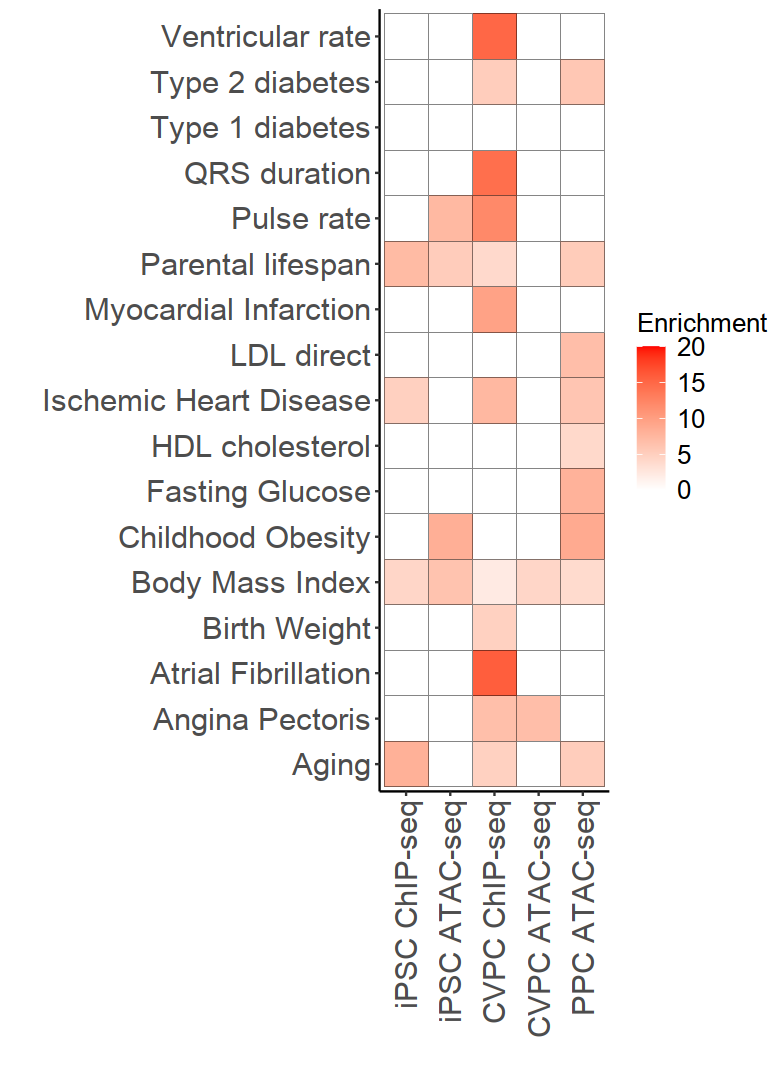

In [44]:
psize(w = 6.5, h = 9)
ggplot(results, aes(x = Category, y = Trait_Description, fill = Enrichment)) +
    geom_tile(color = "black") + 
    scale_fill_gradientn(colors = c("white", "red"), limits = c(0, 20)) + 
    jn_classic + 
    theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
    )  + xlab("") + ylab("")